In [170]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category="ConvergenceWarning")


In [171]:
import io
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [172]:
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [173]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [174]:
ratarata = df_diabetes['age'].mean()
ratarata

41.885856

In [175]:
df_diabetes['age'] = np.where(df_diabetes['age'] < 41 , ratarata, df_diabetes['age'])
df_diabetes[['age']].max()


age    80.0
dtype: float64

In [176]:
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,51.411578,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,12.547462,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,41.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,41.885856,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [177]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_diabetes['smoking_history'] = le.fit_transform(df_diabetes['smoking_history'])
df_diabetes['gender'] = le.fit_transform(df_diabetes['gender'])
df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.000000,0,1,4,25.19,6.6,140,0
1,0,54.000000,0,0,0,27.32,6.6,80,0
2,1,41.885856,0,0,4,27.32,5.7,158,0
3,0,41.885856,0,0,1,23.45,5.0,155,0
4,1,76.000000,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.000000,0,0,0,27.32,6.2,90,0
99996,0,41.885856,0,0,0,17.37,6.5,100,0
99997,1,66.000000,0,0,3,27.83,5.7,155,0
99998,0,41.885856,0,0,4,35.42,4.0,100,0


In [178]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


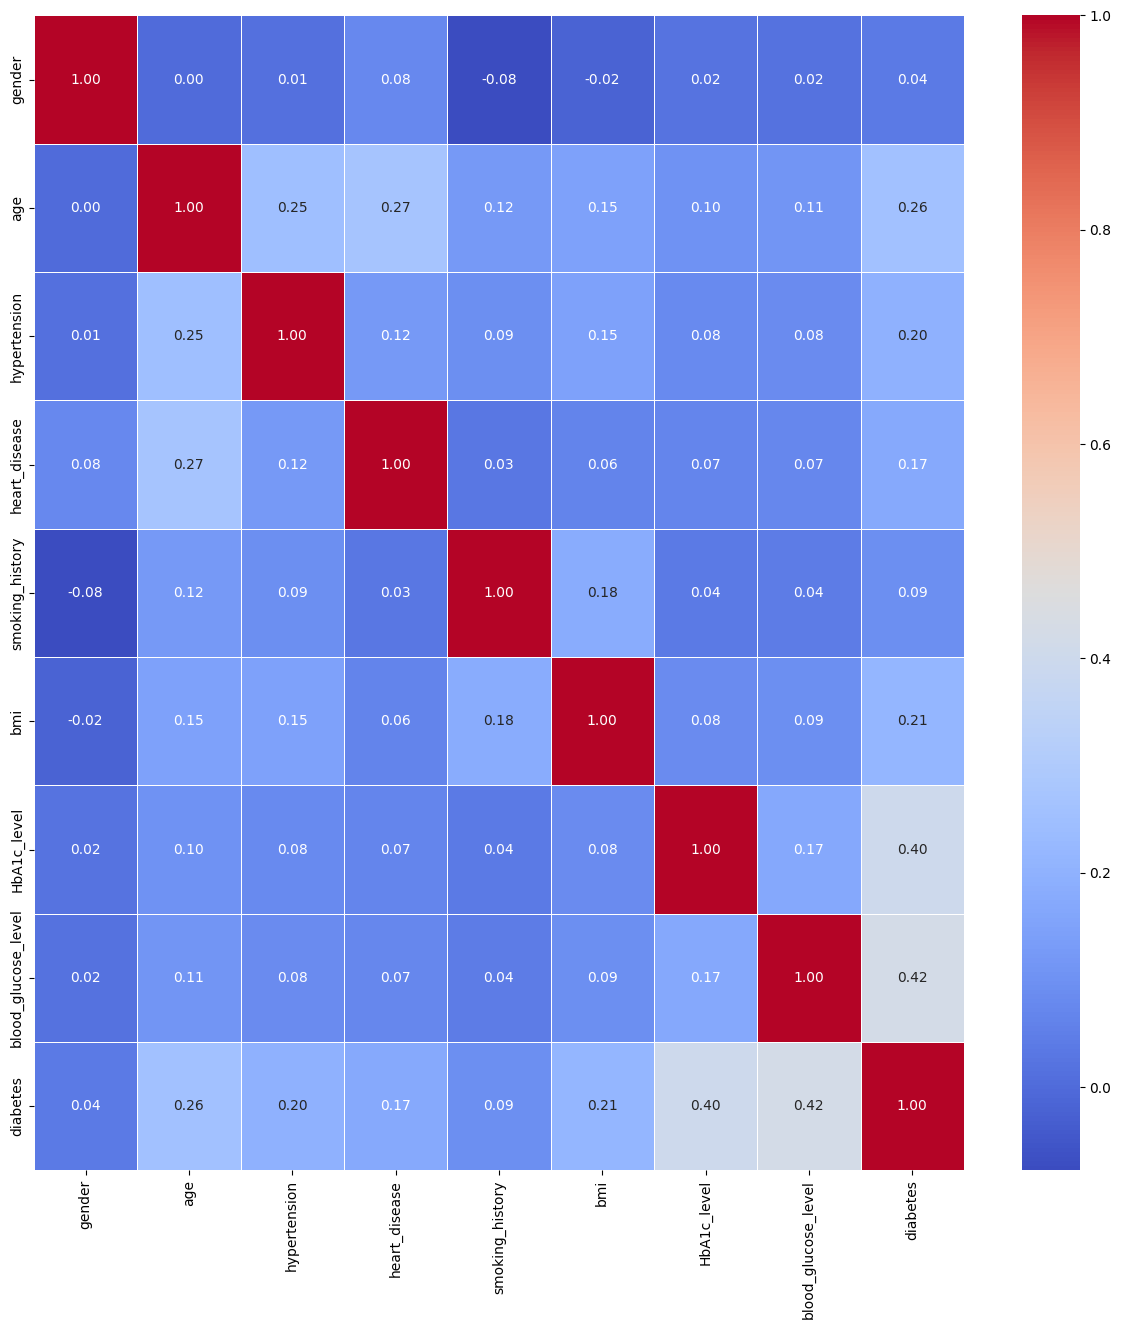

In [179]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df_diabetes.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [180]:
kolom=len(df_diabetes.columns)
for i in range (0, kolom):
  df_diabetes=df_diabetes[df_diabetes.iloc[:,i]!='?']
  df_diabetes=df_diabetes[df_diabetes.iloc[:,i]!='']
  df_diabetes=df_diabetes[~df_diabetes.iloc[:,i].isna()]
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [181]:
import scipy
from scipy import stats

z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df_diabetes.iloc[:,i],df_diabetes.iloc[:,-1])
  z.append([i,df_diabetes.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,7,blood_glucose_level,0.419558
1,6,HbA1c_level,0.400660
2,1,age,0.256434
3,5,bmi,0.214357
4,2,hypertension,0.197823
5,3,heart_disease,0.171727
6,4,smoking_history,0.094290
7,0,gender,0.037411


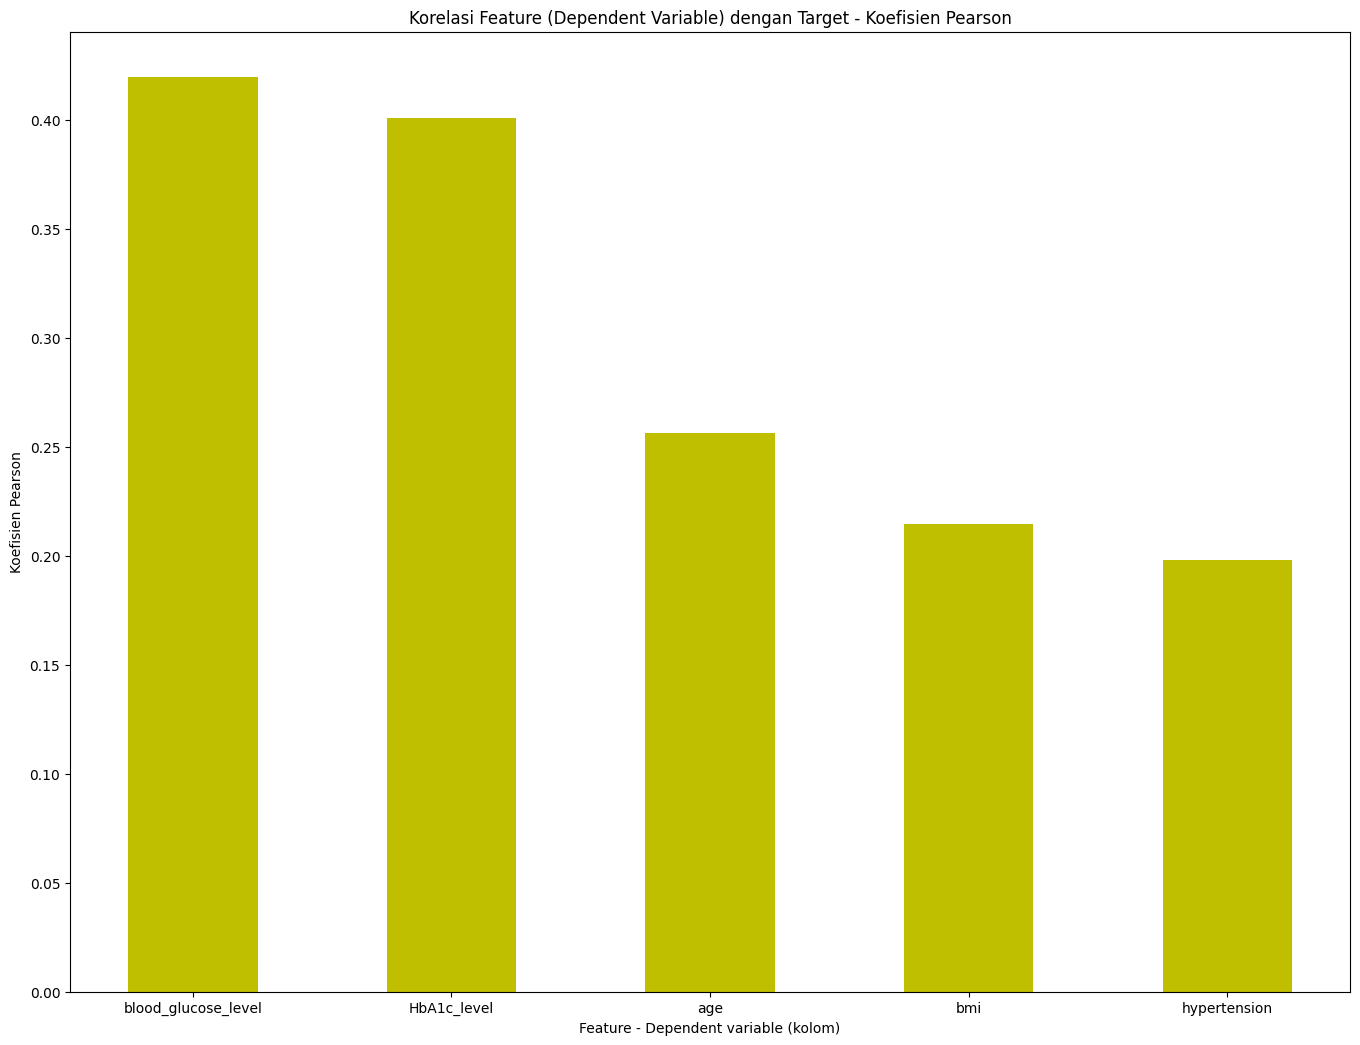

In [182]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [183]:
df_pilihan = df_diabetes[['blood_glucose_level','HbA1c_level','age','bmi','diabetes']]
df_pilihan

,blood_glucose_level,HbA1c_level,age,bmi,diabetes
0,140,6.6,80.000000,25.19,0
1,80,6.6,54.000000,27.32,0
2,158,5.7,41.885856,27.32,0
3,155,5.0,41.885856,23.45,0
4,155,4.8,76.000000,20.14,0
...,...,...,...,...,...
99995,90,6.2,80.000000,27.32,0
99996,100,6.5,41.885856,17.37,0
99997,155,5.7,66.000000,27.83,0
99998,100,4.0,41.885856,35.42,0


PROSES DATA TRAINING DENGAN MENCOBA BEBERAPA ALAGORITMA 

In [184]:
x=df_pilihan.iloc[:,:-1]
y=df_pilihan.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

METODE DECISION TREE BESERTA METODE SEVEN FOLD CROSS VALIDATION UNTUK MENGEVALUASI DATA SEBELUM DI PREDIKSI OLEH ALGORITMA DECISION TREE

In [185]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [187]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.9579 0.9546 0.9554 0.9556 0.9573 0.9553 0.9546 0.9555 0.9526 0.958 ]
rata rata KFold nya adalah:  0.9556800000000001


In [188]:
prediksi1 = clf.predict(x_test)
prediksi1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [189]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  95.49 %


LOGISTIC REGRESION

In [190]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [191]:
scores2 = cross_val_score(classifier, x, y, cv=kf)
print(scores2)
print('rata rata KFold nya adalah: ',scores2.mean())

[0.9603 0.9599 0.9591 0.9597 0.9612 0.9606 0.9575 0.9605 0.9576 0.9585]
rata rata KFold nya adalah:  0.9594900000000001


In [192]:
y_predlog = classifier.predict(x_test)
y_predlog

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
accuracylog = accuracy_score(y_test, y_predlog)
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')

Akurasi menggunkan algoritma logistic Regression adalah : 95.74000000000001 %


NAIVE BAYES


In [194]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_prednaive = nb.predict(x_test)
y_prednaive

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
scores3 = cross_val_score(nb, x, y, cv=kf)
print(scores3)
print('rata rata KFold nya adalah: ',scores3.mean())

[0.957  0.9569 0.9549 0.9555 0.9567 0.9558 0.9586 0.9535 0.9551 0.9573]
rata rata KFold nya adalah:  0.9561300000000001


In [196]:
accuracynavie = accuracy_score(y_test, y_prednaive)
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')


Akurasi menggunakan algoritma naive bayes : 95.405 %


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
y_predknn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
scores4 = cross_val_score(knn, x, y, cv=kf)
print(scores4)
print('rata rata KFold nya adalah: ',scores4.mean())

[0.9579 0.954  0.9551 0.9526 0.9546 0.9529 0.955  0.9562 0.9576 0.9518]
rata rata KFold nya adalah:  0.9547699999999999


In [ ]:
accuracyknn = accuracy_score(y_test, y_predknn)
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')

akurasi untuk penggunaan algoritma KNN adalah : 95.275 %


LINEAR DESCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_predLDA = lda.predict(x_test)
accuracyLDA = accuracy_score(y_test, y_predLDA)
y_predLDA

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
scores5 = cross_val_score(lda, x, y, cv=kf)
print(scores5)
print('rata rata KFold nya adalah: ',scores5.mean())

[0.9546 0.9572 0.957  0.9569 0.9556 0.9555 0.956  0.9561 0.9563 0.9558]
rata rata KFold nya adalah:  0.9561


In [ ]:
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')

Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 95.36 %


EXTRA TRESS CLASIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)
y_predETC = model.predict(x_test)
accuracyETC = accuracy_score(y_test, y_predETC)
y_predETC

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
scores6 = cross_val_score(model, x, y, cv=kf)
print(scores6)
print('rata rata nya adalah: ',scores6.mean())

[0.9618 0.9629 0.9621 0.9647 0.9589 0.9608 0.9624 0.9632 0.9654 0.9638]
rata rata nya adalah:  0.9626000000000001


In [ ]:
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')

Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 96.15 %


HASIL KESELURUHAN DARI SEMUA SEVEN FOLD CROSS VALIDATON

In [ ]:
print('rata rata decision tree adalah: ',scores1.mean())
print('rata rata logistic regression adalah: ',scores2.mean())
print('rata rata naive bayes adalah: ',scores3.mean())
print('rata rata KNN adalah: ',scores4.mean())
print('rata rata Linear Discriminant Analysis adalah: ',scores5.mean())
print('rata rata ExtraTreesClassifier adalah: ',scores6.mean())
print('=='*40)
print('rata rata tertinggi dari CROSS FOLD VALIDATON didapatkan oleh algoritma: ',scores6.mean())

rata rata decision tree adalah:  0.95442
rata rata logistic regression adalah:  0.9595499999999999
rata rata naive bayes adalah:  0.9561499999999998
rata rata KNN adalah:  0.9547699999999999
rata rata Linear Discriminant Analysis adalah:  0.9561
rata rata ExtraTreesClassifier adalah:  0.9626000000000001
rata rata tertinggi dari CROSS FOLD VALIDATON didapatkan oleh algoritma:  0.9626000000000001


HASIL KESELURUHAN DARI ALGORITMA YANG TELAH DICOBA 

In [ ]:
#kesimpulan dari beberapa algoritma pengukuran yang telah dilakukan
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')
print('Akurasi menggunkan algoritma logistic Regression adalah :', (accuracylog)*100,'%')
print("Akurasi menggunakan algoritma naive bayes :", (accuracynavie)*100,'%')
print('akurasi untuk penggunaan algoritma KNN adalah :',(accuracyknn)*100,'%')
print("Akurasi untuk penggunaan algoritma Linear Discriminant Analysis:", (accuracyLDA)*100,'%')
print("Akurasi untuk penggunaan algoritma ExtraTreesClassifier :", (accuracyETC)*100,'%')
print('=='*40)
print('JADI ALGORITMA YANG COCOK UNTUK KARAKTERISTIK DATASET INI ADALAH ALGORITMA EXTRATRESSCLASIFIEER DENGAN AKURASI SEBESAR: ',(accuracyETC)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  95.405 %
Akurasi menggunkan algoritma logistic Regression adalah : 95.74000000000001 %
Akurasi menggunakan algoritma naive bayes : 95.405 %
akurasi untuk penggunaan algoritma KNN adalah : 95.275 %
Akurasi untuk penggunaan algoritma Linear Discriminant Analysis: 95.36 %
Akurasi untuk penggunaan algoritma ExtraTreesClassifier : 96.15 %
JADI ALGORITMA YANG COCOK UNTUK KARAKTERISTIK DATASET INI ADALAH ALGORITMA EXTRATRESSCLASIFIEER DENGAN AKURASI SEBESAR:  96.15 %


AUC(AREA UNDER CURVE)

Nilai AUC Klasifikasi:  0.8389784311277007
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.69050343 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.01254657 1.        ]
Akurasi Klasifikasi:  96.15 %
f-measure score:  0.8686255047510476
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


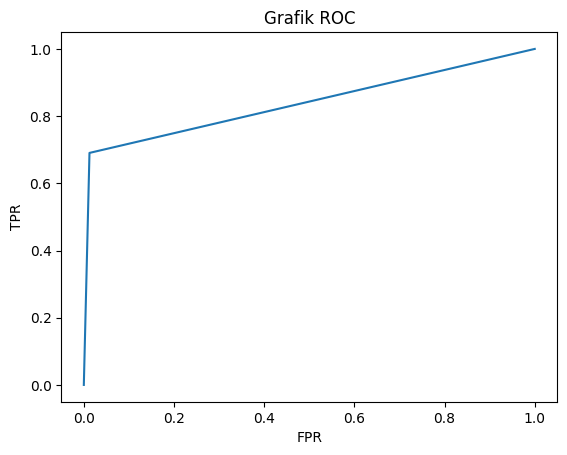

In [ ]:
pred=model.predict(x_test)
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(pred,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,pred,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')